### Numpy basics

In [1]:
import numpy as np

1\. Find the row, column and overall means for the following matrix:

```python
m = np.arange(12).reshape((3,4))
```

In [2]:
m = np.arange(12).reshape((3,4))

In [3]:
print(m) #the initial matix
print("Row: {}".format(m.mean(axis=1))) #mean by the row
print("Column: {}".format(m.mean(axis=0))) #mean my the column
print("Matrix: {}".format(m.mean())) #mean of the overall matrix


[[ 0  1  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]]
Row: [1.5 5.5 9.5]
Column: [4. 5. 6. 7.]
Matrix: 5.5


2\. Find the outer product of the following two vecotrs

```python
u = np.array([1,3,5,7])
v = np.array([2,4,6,8])
```

Do this in the following ways:

   * Using the function outer in numpy
   * Using a nested for loop or list comprehension
   * Using numpy broadcasting operatoins


In [4]:
u = np.array([1,3,5,7])
v = np.array([2,4,6,8])

In [6]:
print("Outer \n {}".format(np.outer(u,v)))
print("List comprehension \n {}".format(np.array([i*j for i in u for j in v]).reshape(4,4))) #reshape from list to matix
print("Numpy \n {}".format(u[:,None]*v))


Outer 
 [[ 2  4  6  8]
 [ 6 12 18 24]
 [10 20 30 40]
 [14 28 42 56]]
List comprehension 
 [[ 2  4  6  8]
 [ 6 12 18 24]
 [10 20 30 40]
 [14 28 42 56]]
Numpy 
 [[ 2  4  6  8]
 [ 6 12 18 24]
 [10 20 30 40]
 [14 28 42 56]]


3\. Create a 10 by 6 matrix of random uniform numbers. Set all rows with any entry less than 0.1 to be zero

Hint: Use the following numpy functions - np.random.random, np.any as well as Boolean indexing and the axis argument.

In [9]:
matrix = np.random.uniform(size=(10,6))

print("Initial \n {} \n".format(matrix))

print("Final with only elms setted to zero \n {} \n".format(np.where(matrix<0.1,0,matrix)))

matrix[np.any(matrix<0.1,axis=1)]=0
print("Final \n {}".format(matrix))

Initial 
 [[0.22614471 0.49707168 0.22131148 0.51712241 0.5078181  0.71742878]
 [0.18147377 0.71608118 0.10101706 0.5071493  0.38573664 0.62065611]
 [0.77425905 0.42841148 0.31417621 0.67277954 0.31228255 0.07036823]
 [0.30292793 0.01186525 0.93797784 0.57615886 0.62912444 0.57827644]
 [0.00220019 0.32243829 0.57217968 0.89688752 0.36117918 0.79869715]
 [0.28900957 0.5000045  0.54312589 0.0237777  0.46738394 0.29112806]
 [0.64889541 0.05815466 0.02557483 0.56447664 0.96978127 0.94042425]
 [0.12609852 0.66606659 0.83956759 0.73027021 0.37514265 0.06566031]
 [0.8489289  0.32253714 0.61395587 0.30440465 0.36202859 0.11333664]
 [0.20880123 0.02842734 0.75348337 0.55065264 0.49493747 0.33392595]] 

Final with only elms setted to zero 
 [[0.22614471 0.49707168 0.22131148 0.51712241 0.5078181  0.71742878]
 [0.18147377 0.71608118 0.10101706 0.5071493  0.38573664 0.62065611]
 [0.77425905 0.42841148 0.31417621 0.67277954 0.31228255 0.        ]
 [0.30292793 0.         0.93797784 0.57615886 0.6291

4\. Use np.linspace to create an array of 100 numbers between 0 and 2π (includsive).

  * Extract every 10th element using slice notation
  * Reverse the array using slice notation
  * Extract elements where the absolute difference between the sine and cosine functions evaluated at that element is less than 0.1
  * Make a plot showing the sin and cos functions and indicate where they are close

In [10]:
import math
import matplotlib.pyplot as plt
%matplotlib inline

initial linspaece 
 [0.         0.06346652 0.12693304 0.19039955 0.25386607 0.31733259
 0.38079911 0.44426563 0.50773215 0.57119866 0.63466518 0.6981317
 0.76159822 0.82506474 0.88853126 0.95199777 1.01546429 1.07893081
 1.14239733 1.20586385 1.26933037 1.33279688 1.3962634  1.45972992
 1.52319644 1.58666296 1.65012947 1.71359599 1.77706251 1.84052903
 1.90399555 1.96746207 2.03092858 2.0943951  2.15786162 2.22132814
 2.28479466 2.34826118 2.41172769 2.47519421 2.53866073 2.60212725
 2.66559377 2.72906028 2.7925268  2.85599332 2.91945984 2.98292636
 3.04639288 3.10985939 3.17332591 3.23679243 3.30025895 3.36372547
 3.42719199 3.4906585  3.55412502 3.61759154 3.68105806 3.74452458
 3.8079911  3.87145761 3.93492413 3.99839065 4.06185717 4.12532369
 4.1887902  4.25225672 4.31572324 4.37918976 4.44265628 4.5061228
 4.56958931 4.63305583 4.69652235 4.75998887 4.82345539 4.88692191
 4.95038842 5.01385494 5.07732146 5.14078798 5.2042545  5.26772102
 5.33118753 5.39465405 5.45812057 5.52158709

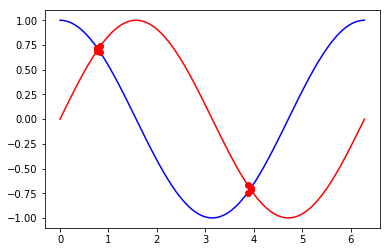

In [16]:
linspace = np.linspace(0, 2*math.pi, num=100, endpoint=True)
print("initial linspaece \n {} \n".format(linspace))
extracted = linspace[::10]

print("Extacted elements: \n {} \n".format(extracted))

revers = linspace[::-1]
print("Reversed the inital linspace: \n {}\n".format(revers))

extracted = linspace[np.where(abs(np.sin(linspace)-np.cos(linspace))<0.1)]
print("Searched elements: \n {} \n".format(extracted))


x = np.sin(linspace) #numpy sin
y = np.cos(linspace) #numpy cos
plt.plot(linspace, x,'r-') 
plt.plot(linspace, y,'b-')

idx = np.argwhere(abs(x-y)<0.1).flatten()  #find where abs(x-y)<0.1 and flatten the results to have (n,) as shape
plt.plot(linspace[idx], x[idx], 'ro')
plt.plot(linspace[idx], y[idx], 'ro')
plt.show()

5\. Create a matrix that shows the 10 by 10 multiplication table.

 * Find the trace of the matrix
 * Extract the anto-diagonal (this should be ```array([10, 18, 24, 28, 30, 30, 28, 24, 18, 10])```)
 * Extract the diagnoal offset by 1 upwards (this should be ```array([ 2,  6, 12, 20, 30, 42, 56, 72, 90])```)

In [23]:
#10x10 starting from 1
matrix = np.array([i*j for i in range(1,11) for j in range(1,11)]).reshape(10,10)

print("Trace: \n {} \n".format(matrix.trace()))

print("Anti diagonal method 1: \n {} \n".format(np.diag(matrix[:,::-1]))) #all reversing the column of the matrix -> diag
r = [i for i in range(9,-1,-1)]
c = [9-i for i in range(9,-1,-1)]
print("Anti diagonal method 2: \n {} \n".format(matrix[r,c]))
print("Diag with offset: \n {} \n".format(np.diag(np.roll(matrix, -1, axis=0))))


Trace: 
 385 

Anti diagonal method 1: 
 [10 18 24 28 30 30 28 24 18 10] 

Anti diagonal method 2: 
 [10 18 24 28 30 30 28 24 18 10] 

Diag with offset: 
 [ 2  6 12 20 30 42 56 72 90 10] 



6\. Use broadcasting to create a grid of distances

Route 66 crosses the following cities in the US: Chicago, Springfield, Saint-Louis, Tulsa, Oklahoma City, Amarillo, Santa Fe, Albuquerque, Flagstaff, Los Angeles
The corresponding positions in miles are: 0, 198, 303, 736, 871, 1175, 1475, 1544, 1913, 2448

  * Construct a 2D grid of distances among each city along Route 66
  * Convert that in km (those savages...)

In [26]:
route66 = np.array([0, 198, 303, 736, 871, 1175, 1475, 1544, 1913, 2448])
d2grid = route66[None,:]-route66[:,None]
print("Initial grid: \n {} \n".format(d2grid))
print("Converted: \n {} \n".format(d2grid*1.609344))

Initial grid: 
 [[    0   198   303   736   871  1175  1475  1544  1913  2448]
 [ -198     0   105   538   673   977  1277  1346  1715  2250]
 [ -303  -105     0   433   568   872  1172  1241  1610  2145]
 [ -736  -538  -433     0   135   439   739   808  1177  1712]
 [ -871  -673  -568  -135     0   304   604   673  1042  1577]
 [-1175  -977  -872  -439  -304     0   300   369   738  1273]
 [-1475 -1277 -1172  -739  -604  -300     0    69   438   973]
 [-1544 -1346 -1241  -808  -673  -369   -69     0   369   904]
 [-1913 -1715 -1610 -1177 -1042  -738  -438  -369     0   535]
 [-2448 -2250 -2145 -1712 -1577 -1273  -973  -904  -535     0]] 

Converted: 
 [[    0.         318.650112   487.631232  1184.477184  1401.738624
   1890.9792    2373.7824    2484.827136  3078.675072  3939.674112]
 [ -318.650112     0.         168.98112    865.827072  1083.088512
   1572.329088  2055.132288  2166.177024  2760.02496   3621.024   ]
 [ -487.631232  -168.98112      0.         696.845952   914.107392
 

7\. Prime numbers sieve: compute the prime numbers in the 0-N (N=99 to start with) range with a sieve (mask).
  * Constract a shape (100,) boolean array, the mask
  * Identify the multiples of each number starting from 2 and set accordingly the corresponding mask element
  * Apply the mask to obtain an array of ordered prime numbers
  * Check the performances (timeit); how does it scale with N?
  * Implement the optimization suggested in the [sieve of Eratosthenes](https://en.wikipedia.org/wiki/Sieve_of_Eratosthenes)

On my laptop:

- N = 100
 - 319 µs ± 224 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)
 - 31.1 µs ± 5.52 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)

- N = 1000
 - 4.8 ms ± 380 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)
 - 227 µs ± 4.21 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)

- N = 10000
 - 288 ms ± 7.78 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
 - 2.43 ms ± 279 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)

As we an see the fasted is as expected the second implementation with the optimization suggested.
The performance is not linear for the first implementation 10 times the size does not imply 10 times more computational time(easily seen between the second and the first run).
For the optimized one more or less it can be seen in that way.

In [28]:
N = 100
def impl(N):
    mat = np.ones((N-1,), dtype=bool)
    numb = np.array([x for x in range(1,N)])
    for i in range(2,math.ceil(N/2)):
        mat[(numb%i==0) & (numb > i)] = False

def impl2(N):
    mat = np.ones((N-1,), dtype=bool)
    numb = np.array([x for x in range(1,N)])
    
    for i in range(2,math.ceil(N**0.5)-1):
        if(mat[i]):
            for j in range(i**2,N-1):
                mat[j] = False
    
%timeit -n 10 impl(N)
%timeit -n 10 impl2(N)
%timeit -n 10 impl(N*10)
%timeit -n 10 impl2(N*10)
%timeit -n 10 impl(N*100)
%timeit -n 10 impl2(N*100)


240 µs ± 37.9 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)
43.7 µs ± 14.3 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)
4.68 ms ± 223 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)
228 µs ± 3.42 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)
284 ms ± 5.87 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
2.1 ms ± 7.38 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)


8\. Diffusion using random walk

Consider a simple random walk process: at each step in time, a walker jumps right or left (+1 or -1) with equal probability. The goal is to find the typical distance from the origin of a random walker after a given amount of time. 
To do that, let's simulate many walkers and create a 2D array with each walker as a raw and the actual time evolution as columns

  * Take 1000 walkers and let them walk for 200 steps
  * Use randint to create a 2D array of size walkers x steps with values -1 or 1
  * Build the actual walking distances for each walker (i.e. another 2D array "summing on each raw")
  * Take the square of that 2D array (elementwise)
  * Compute the mean of the squared distances at each step (i.e. the mean along the columns)
  * Plot the average distances (sqrt(distance\*\*2)) as a function of time (step)
  
Did you get what you expected?

TODO ANSWER

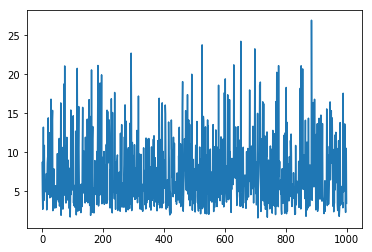

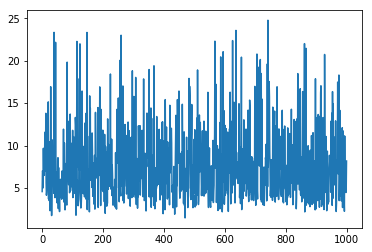

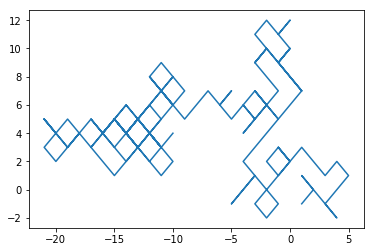

In [48]:
np.random.seed(10)
walkers_x = np.zeros((1000,200))
for i in range(walkers_x.shape[0]):
    mat = np.random.randint(-1,1,size=walkers_x.shape[1]) #produce -1,0
    mat[mat==0]=1 #set the 0 to 1
    walkers_x[i] = mat

walkers_y = np.zeros((1000,200))
for i in range(walkers_y.shape[0]):
    mat = np.random.randint(-1,1,size=walkers_y.shape[1]) #produce -1,0
    mat[mat==0]=1 #set the 0 to 1
    walkers_y[i] = mat
    
sums_x = np.cumsum(walkers_x, axis=1)
sq_sums_x = sums_x**2
means_x = np.mean(sq_sums_x**0.5, axis=1)
plt_x = plt
plt_x.plot(means_x)
plt_x.show()

sums_y = np.cumsum(walkers_y, axis=1)
sq_sums_y = sums_y**2
means_y = np.mean(sq_sums_y**0.5, axis=1)
plt_y = plt
plt_y.plot(means_y)
plt_y.show()

plt.plot(sums_x[0,:],sums_y[0,:])

9\. Analyze a data file 
  * Download the population of hares, lynxes and carrots at the beginning of the last century.
    ```python
    ! wget https://www.dropbox.com/s/3vigxoqayo389uc/populations.txt
    ```

  * Check the content by looking within the file
  * Load the data (use an appropriate numpy method) into a 2D array
  * Create arrays out of the columns, the arrays being (in order): *year*, *hares*, *lynxes*, *carrots* 
  * Plot the 3 populations over the years
  * Compute the main statistical properties of the dataset (mean, std, correlations, etc.)
  * Which species has the highest population each year?

Do you feel there is some evident correlation here? [Studies](https://www.enr.gov.nt.ca/en/services/lynx/lynx-snowshoe-hare-cycle) tend to believe so.

No-one.
Seems so since the populations grows and decrese one after the other. The circle of life. When the relative "predator" disappear one of the species grows, providing to the predator food and so letting its population growing again. After a while the predator overcome the prey and the circle restarts.

In [49]:
! wget https://www.dropbox.com/s/3vigxoqayo389uc/populations.txt

'wget' is not recognized as an internal or external command,
operable program or batch file.


In [50]:
with open('populations.txt') as f:
    for line in f:
        print(line)
        
    file = np.loadtxt('populations.txt')
    years = file[:,0]
    hares = file[:,1]
    lynxes = file[:,2]
    carrots = file[:,3]
    plt.plot(years, hares, 'bx')
    plt.plot(years, lynxes, 'rx')    
    plt.plot(years, carrots, 'kx')
    print("Hares mean: {}, std: {}".format(hares.mean(),hares.std()))
    print("Lynxes mean: {}, std: {}".format(lynxes.mean(),lynxes.std()))    
    print("Carrots mean: {}, std: {}".format(carrots.mean(),carrots.std()))
    print("\n")
    print("Carrots vs Hares correlation: {}".format(np.corrcoef(carrots,hares)))
    print("Lynxes vs Hares correlation: {}".format(np.corrcoef(hares,lynxes)))    
    print("Lynxes vs Carrots correlation: {}".format(np.corrcoef(lynxes,carrots)))    
    print("Whole data against each other corr: \n {}".format(np.corrcoef(file, rowvar=False)))

FileNotFoundError: [Errno 2] No such file or directory: 'populations.txt'